Gomez-Elegido, Miriam: Grade=100/100

In [1]:
#Excercise 1
#Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

import numpy as np
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
y = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
z = np.dot(x, y)
print z

[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]


In [2]:
#Exercise 2:
#Write code to find k such that fn(x) converges (i.e., that by increasing k, the result no longer changes).

import math

pi = 3.141592653
y = 2

def fn(x, y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

while fn(pi*5./2., y) - fn(pi*5./2., y - 1) != 0:
    y += 1
    
print y


30


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gaussian parameters:  494.458597871 316.067037175 268.656513573 185.303185445 405.256594542


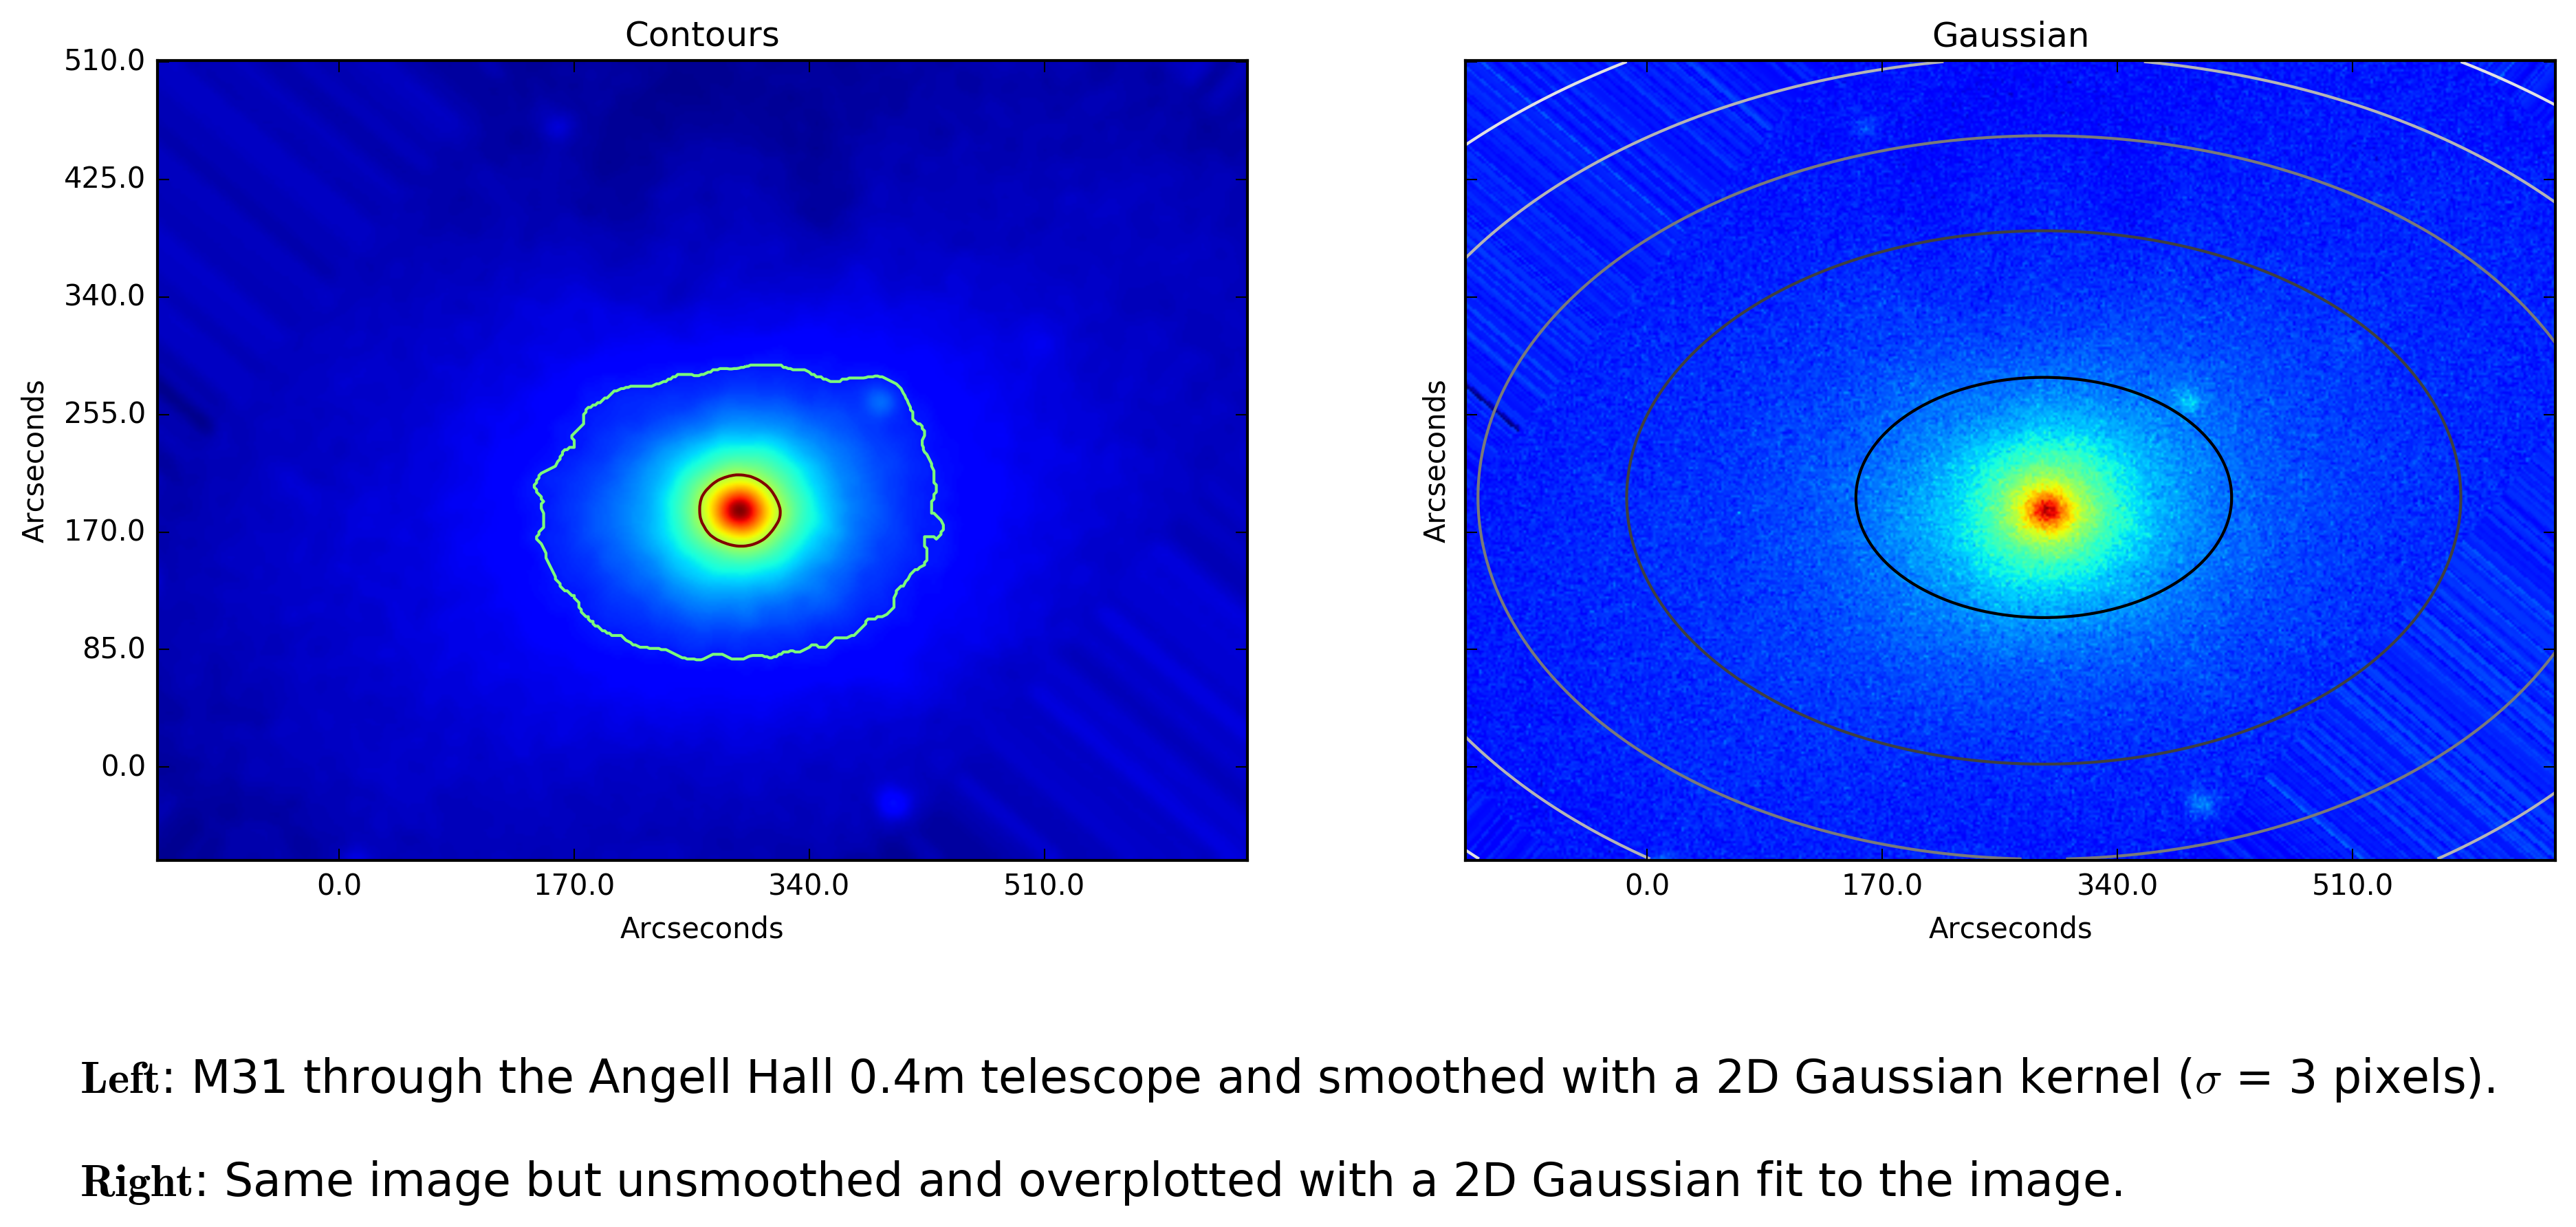

In [4]:
#Exercise 3:
#Read in the image called andromeda_rot.fits. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy cookbook and search for 2D Gaussian). Make the labels be in arcseconds (not pixels). In order to switch from pixels to arcseonds, you will need to extract the image tick values and use the known fact that every pixel is 1.7 arcseconds (the resolution of the instrument).

import sys
root = "/Users/miriamge/introduction/"

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#set figure size
from matplotlib import rcParams
rcParams["savefig.dpi"]=300

#load in fits file from path set above
from astropy.io import fits
sys.path.append(root)
data = fits.getdata(root + 'andromeda_rot.fits')

#set up two plots next to each other
f, ((ax2, ax1)) = plt.subplots(1, 2, sharey='row',figsize=(15,5))

#smoothed image with gaussians
from scipy import ndimage
blurred_data = ndimage.gaussian_filter(data,sigma=3)
ax2.imshow(blurred_data)
ax2.contour(blurred_data,[200,400,600])

from numpy import *
from scipy import optimize
from pylab import *

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(-(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[(x),:]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

# Create the gaussian data (with a bit of noise:
ax1.imshow(data, cmap=cm.jet)

params = fitgaussian(data)
fit = gaussian(*params)

#pixel image
ax1.contour(fit(*indices(data.shape)), cmap=cm.Greys)
(height, y, x, width_y, width_x) = params

print 'Gaussian parameters: ', width_x, width_y, x,y,height

#set labels and title for second plot
ax2.set_title('Contours')
ax2.set_xlabel('Arcseconds')
ax2.set_ylabel('Arcseconds')

ylabels=ax2.get_yticks().tolist()
ylabels.reverse()
ylabels = [1.7*x for x in ylabels]
ax2.set_yticklabels(ylabels)

xlabels=ax2.get_xticks().tolist()
xlabels = [1.7*x for x in xlabels]
ax2.set_xticklabels(xlabels)

#set labels and title for first plot
ax1.set_title('Gaussian')
ax1.set_xlabel('Arcseconds')
ax1.set_ylabel('Arcseconds')

ylabels=ax1.get_yticks().tolist()
ylabels = [1.7*x for x in ylabels]
ylabels.reverse()
ax1.set_yticklabels(ylabels)

xlabels=ax1.get_xticks().tolist()
xlabels = [1.7*x for x in xlabels]
ax1.set_xticklabels(xlabels)

plt.figtext(.1, -0.1, r"${\bf Left}$: M31 through the Angell Hall 0.4m \
telescope and smoothed with a 2D Gaussian kernel ($\sigma$ = 3 pixels).", size=16)
plt.figtext(.1, -0.2, r"${\bf Right}$: Same image but unsmoothed and \
overplotted with a 2D Gaussian fit to the image.", size=16)

In [5]:
#Exercise 5:
#Discuss how this tutorial enabled you to meet the 6 defined learning goals. 
#For each goal, provide your own insight as to why it is important for modern astronomy.

#Learning Goals for this Lab
# 1.Introduce yourself to the Python language, the use of a notebook, and the use of GIT repositories.
'''While I have had some experience with Python and git in EECS183, this excerice really went deeper into their uses and familiarized me.  This is crucial in the field of astronomy since python is so commonly used.'''
# 2.Learn how to make and manipulate numerical data as vectors and n-dimensional matrices.
'''By creating my own matrices in this excerice (as well as multiplying them as vectors), I feel very familiar with the concept now.  This can have many applications in the scientific world and will surely come in handy.'''
# 3.Learn how to make, manipulate, and annotate figures.
'''The third excercise allowed me to learn how to deal with figures.  This is very important in modern astronomy to make figures more readable when sharing data and research.'''
# 4.Learn how to read in and manipulate tabular data.
'''By now knowing how to read in and manipulate tabular data, that will make data collection so much faster and efficient when I am working on real research in the astronomy field that uses tables.'''
# 5.Learn how to define functions and to use simple loops in your programming.
'''I have had experience with functions and loops in other languages, but this tutorial really helped me learning them in Python. In any field programming functions makes calculations so much faster.'''
# 6.Learn how to read in and manipulate astronomical image data.
'''I had not known that we could read in an actual image then manipulate it before and that is so cool!  This is very handy in astronomy since we will have to make our data pretty when publishing it.'''

'I had not known that we could read in an actual image then manipulate it before and that is so cool!  This is very handy in astronomy since we will have to make our data pretty when publishing it.'